In [22]:
%matplotlib inline

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.feature import match_template

In [18]:
f = os.path.join('wndchrm_test_data',
                'proximal_acinar_tubules_no_blue',
                '2015-04-029_20X_C57Bl6_E16.5_LMM.14.24.4.46_SOX9_SFTPC_ACTA2_004_<832,1088>_no-blue.tif')
f0 = os.path.join('wndchrm_test_data', 
                 '2015-04-029_20X_C57Bl6_E16.5_LMM.14.24.4.46_SOX9_SFTPC_ACTA2_001.tif')

target = io.imread(f).astype(np.uint8)
image = io.imread(f0).astype(np.uint8)

result = np.squeeze(match_template(image, target))
ij = np.unravel_index(np.argmax(result), result.shape)

In [19]:
result.shape

(2356, 2350)

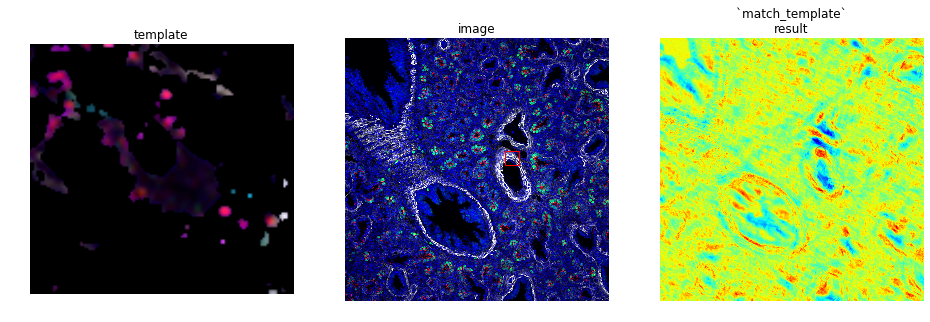

In [25]:
x, y, = ij[::-1]

fig = plt.figure(figsize=(16, 10))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, adjustable='box-forced')
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2, adjustable='box-forced')

ax1.imshow(target)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
h, w, d = target.shape
rect = plt.Rectangle((x, y), w, h, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)
pass